In [1]:
import sys
import os
import caffe
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/home/nakamura/pytorch-i3d/")
from caffe import layers as L, params as P
from experiment import top_30_class as experiment
caffe.set_mode_gpu()

/home/nakamura/pytorch-i3d


In [2]:
net = caffe.Net("models/bvlc_googlenet/train_val.prototxt", "models/bvlc_googlenet/bvlc_googlenet.caffemodel", caffe.TRAIN)
mlb = experiment.mlb

In [24]:
net.forward()

{'loss1/loss1': array(24.323132, dtype=float32),
 'loss2/loss2': array(22.202324, dtype=float32),
 'loss3/loss3': array(20.63464, dtype=float32)}

['man']


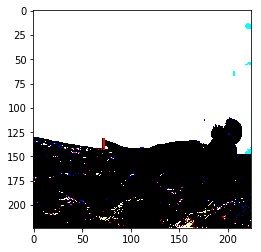

In [25]:
label = net.blobs["label"].data
image = net.blobs["data"].data

lab = label[0, :, 0, 0]
img = image[0].transpose([1,2,0])
img = img[:,:,::-1]
print(mlb.classes_[lab.astype(np.bool)])
plt.imshow(img)

In [26]:
solver = caffe.get_solver("models/bvlc_googlenet/solver.prototxt")
weight = "models/bvlc_googlenet/bvlc_googlenet.caffemodel"
solver.net.copy_from(weight)

In [27]:
n_iter = 10000
loss_layers = ["loss1/loss1", "loss2/loss2", "loss3/loss3"]
loss = {layer: np.zeros(n_iter) for layer in loss_layers }
for it in range(n_iter):
    solver.step(1)
    for layer in loss_layers:
        loss[layer][it] = solver.net.blobs[layer].data.copy() 
        if it % 100 == 0:
            print("step {0:4d}, {1} : {2:f}".format(it, layer, loss[layer][it]))

step    0, loss1/loss1 : 24.738480
step    0, loss2/loss2 : 22.471153
step    0, loss3/loss3 : 18.379782
step  100, loss1/loss1 : 3.642714
step  100, loss2/loss2 : 3.955404
step  100, loss3/loss3 : 2.761778
step  200, loss1/loss1 : 3.683069
step  200, loss2/loss2 : 4.138904
step  200, loss3/loss3 : 2.834946
step  300, loss1/loss1 : 2.739234
step  300, loss2/loss2 : 2.779387
step  300, loss3/loss3 : 1.550982
step  400, loss1/loss1 : 2.729930
step  400, loss2/loss2 : 2.677213
step  400, loss3/loss3 : 1.736970
step  500, loss1/loss1 : 3.111559
step  500, loss2/loss2 : 2.852220
step  500, loss3/loss3 : 1.501751
step  600, loss1/loss1 : 2.644162
step  600, loss2/loss2 : 2.610458
step  600, loss3/loss3 : 1.566884
step  700, loss1/loss1 : 2.600223
step  700, loss2/loss2 : 2.191708
step  700, loss3/loss3 : 1.332523
step  800, loss1/loss1 : 2.922802
step  800, loss2/loss2 : 2.560648
step  800, loss3/loss3 : 1.339662
step  900, loss1/loss1 : 2.678158
step  900, loss2/loss2 : 2.319236
step  900, 

step 8100, loss1/loss1 : 2.878846
step 8100, loss2/loss2 : 2.735906
step 8100, loss3/loss3 : 1.637895
step 8200, loss1/loss1 : 2.373422
step 8200, loss2/loss2 : 2.117260
step 8200, loss3/loss3 : 1.193752
step 8300, loss1/loss1 : 2.883437
step 8300, loss2/loss2 : 2.220974
step 8300, loss3/loss3 : 1.288094
step 8400, loss1/loss1 : 2.566739
step 8400, loss2/loss2 : 2.339509
step 8400, loss3/loss3 : 1.483244
step 8500, loss1/loss1 : 2.597621
step 8500, loss2/loss2 : 2.667138
step 8500, loss3/loss3 : 1.409061
step 8600, loss1/loss1 : 2.604644
step 8600, loss2/loss2 : 2.504338
step 8600, loss3/loss3 : 1.539282
step 8700, loss1/loss1 : 2.723366
step 8700, loss2/loss2 : 2.382647
step 8700, loss3/loss3 : 1.404318
step 8800, loss1/loss1 : 2.934970
step 8800, loss2/loss2 : 2.401673
step 8800, loss3/loss3 : 1.392479
step 8900, loss1/loss1 : 2.782969
step 8900, loss2/loss2 : 2.536909
step 8900, loss3/loss3 : 1.726348
step 9000, loss1/loss1 : 2.834674
step 9000, loss2/loss2 : 2.078304
step 9000, los

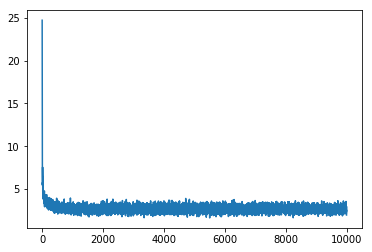

In [29]:
plt.plot(loss["loss1/loss1"])